<a href="https://colab.research.google.com/github/ohumkar/Fake-News/blob/main/FlaskData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Set seaborn as default style

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Official Folder of Flaskdata Detecting Anomalies/Data/Samples/SampleFile.csv')

In [ ]:
df.head()

,STUDYID,DOMAIN,USUBJID,AESEQ,AESPID,AETERM,AELLT,AELLTCD,AEDECOD,AEPTCD,AEHLT,AEHLTCD,AEHLGT,AEHLGTCD,AEBODSYS,AEBDSYCD,AESOC,AESOCCD,AESER,AEACN,AEACNOTH,AEREL,AERELNST,AEOUT,AESCONG,AESDISAB,AESDTH,AESHOSP,AESLIFE,AESMIE,AECONTRT,AETOXGR,ETCD,ELEMENT,EPOCH,AESTDTC,AEENDTC,AESTDY,AEENDY,AEENRTPT,AEENTPT
0,200066003,AE,1,1.0,11,NaN,Abdominal pain,10000081.0,Abdominal pain,10000081.0,Gastrointestinal and abdominal pains (excl ora...,10017926.0,Gastrointestinal signs and symptoms,10018012.0,Gastrointestinal disorders,10017947.0,Gastrointestinal disorders,10017947.0,N,DOSE NOT CHANGED,NONE,UNRELATED,NONE,RECOVERED/RESOLVED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,TRT_PLA,Gemcitabine and Placebo,TREATMENT,2013-07-11,2013-07-11,3.0,3.0,NaN,NaN
1,200066003,AE,1,2.0,17,NaN,Anorexia,10002646.0,Decreased appetite,10061428.0,Appetite disorders,10003022.0,Appetite and general nutritional disorders,10003018.0,Metabolism and nutrition disorders,10027433.0,Metabolism and nutrition disorders,10027433.0,N,NOT APPLICABLE,NONE,UNRELATED,NONE,RECOVERED/RESOLVED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,PTP,Post Treatment Period,POST TREATMENT,2013-09-14,2013-11-26,68.0,141.0,NaN,NaN
2,200066003,AE,1,3.0,6,NaN,Anxiety,10002855.0,Anxiety,10002855.0,Anxiety symptoms,10002869.0,Anxiety disorders and symptoms,10002861.0,Psychiatric disorders,10037175.0,Psychiatric disorders,10037175.0,N,DOSE NOT CHANGED,NONE,UNRELATED,NONE,RECOVERED/RESOLVED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,TRT_PLA,Gemcitabine and Placebo,TREATMENT,2013-08-13,2013-08-14,36.0,37.0,NaN,NaN
3,200066003,AE,1,4.0,7,NaN,Anxiety,10002855.0,Anxiety,10002855.0,Anxiety symptoms,10002869.0,Anxiety disorders and symptoms,10002861.0,Psychiatric disorders,10037175.0,Psychiatric disorders,10037175.0,N,DOSE NOT CHANGED,NaN,UNRELATED,NONE,NOT RECOVERED/NOT RESOLVED,NaN,NaN,NaN,NaN,NaN,NaN,Y,1,TRT_PLA,Gemcitabine and Placebo,TREATMENT,2013-08-20,******,43.0,NaN,AFTER,STUDY END
4,200066003,AE,1,5.0,18,NaN,Dehydration,10012174.0,Dehydration,10012174.0,Total fluid volume decreased,10044084.0,Electrolyte and fluid balance conditions,10014412.0,Metabolism and nutrition disorders,10027433.0,Metabolism and nutrition disorders,10027433.0,N,NOT APPLICABLE,NaN,UNRELATED,NONE,RECOVERED/RESOLVED,NaN,NaN,NaN,NaN,NaN,NaN,Y,2,PTP,Post Treatment Period,POST TREATMENT,2013-09-14,2013-09-25,68.0,79.0,NaN,NaN


In [ ]:
null_values = list(df.isnull().sum() * 100 / df.shape[0] )
null_col_ids = [i for i in range(len(null_values)) if null_values[i] >= 35.0]
null_cols = [df.columns[i] for i in null_col_ids]
# print(null_col_ids)
data = df.drop(null_cols, axis = 1)

In [ ]:
data.isnull().sum() * 100/ data.shape[0]

STUDYID      0.000000
DOMAIN       0.000000
USUBJID      0.000000
AESEQ        0.000000
AESPID       0.000000
AELLT        0.000000
AELLTCD      0.000000
AEDECOD      0.000000
AEPTCD       0.000000
AEHLT        0.000000
AEHLTCD      0.000000
AEHLGT       0.000000
AEHLGTCD     0.000000
AEBODSYS     0.000000
AEBDSYCD     0.000000
AESOC        0.000000
AESOCCD      0.000000
AESER        0.000000
AEACN        0.000000
AEACNOTH    25.376344
AEREL        0.215054
AERELNST     0.000000
AEOUT       16.129032
AETOXGR      0.000000
ETCD         0.107527
ELEMENT      0.322581
EPOCH        0.107527
AESTDTC      0.000000
AEENDTC      0.000000
AESTDY       0.752688
AEENDY      14.623656
dtype: float64

In [ ]:
cols = set(data.columns)
numerical_cols = set(data._get_numeric_data())
categorical_cols = cols.difference(numerical_cols)
print('Numerical Columns: \n',numerical_cols)
print('Categorical Columns: \n',categorical_cols)

Numerical Columns: 
 {'AETOXGR', 'AEHLGTCD', 'AESOCCD', 'USUBJID', 'AEBDSYCD', 'AEPTCD', 'AESPID', 'AEENDY', 'AESTDY', 'AESEQ', 'AEHLTCD', 'AELLTCD', 'STUDYID'}
Categorical Columns: 
 {'AESTDTC', 'AEHLGT', 'AEACN', 'AESOC', 'AEDECOD', 'AERELNST', 'AEBODSYS', 'DOMAIN', 'AELLT', 'ETCD', 'AESER', 'AEHLT', 'EPOCH', 'AEENDTC', 'AEACNOTH', 'AEREL', 'AEOUT', 'ELEMENT'}


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

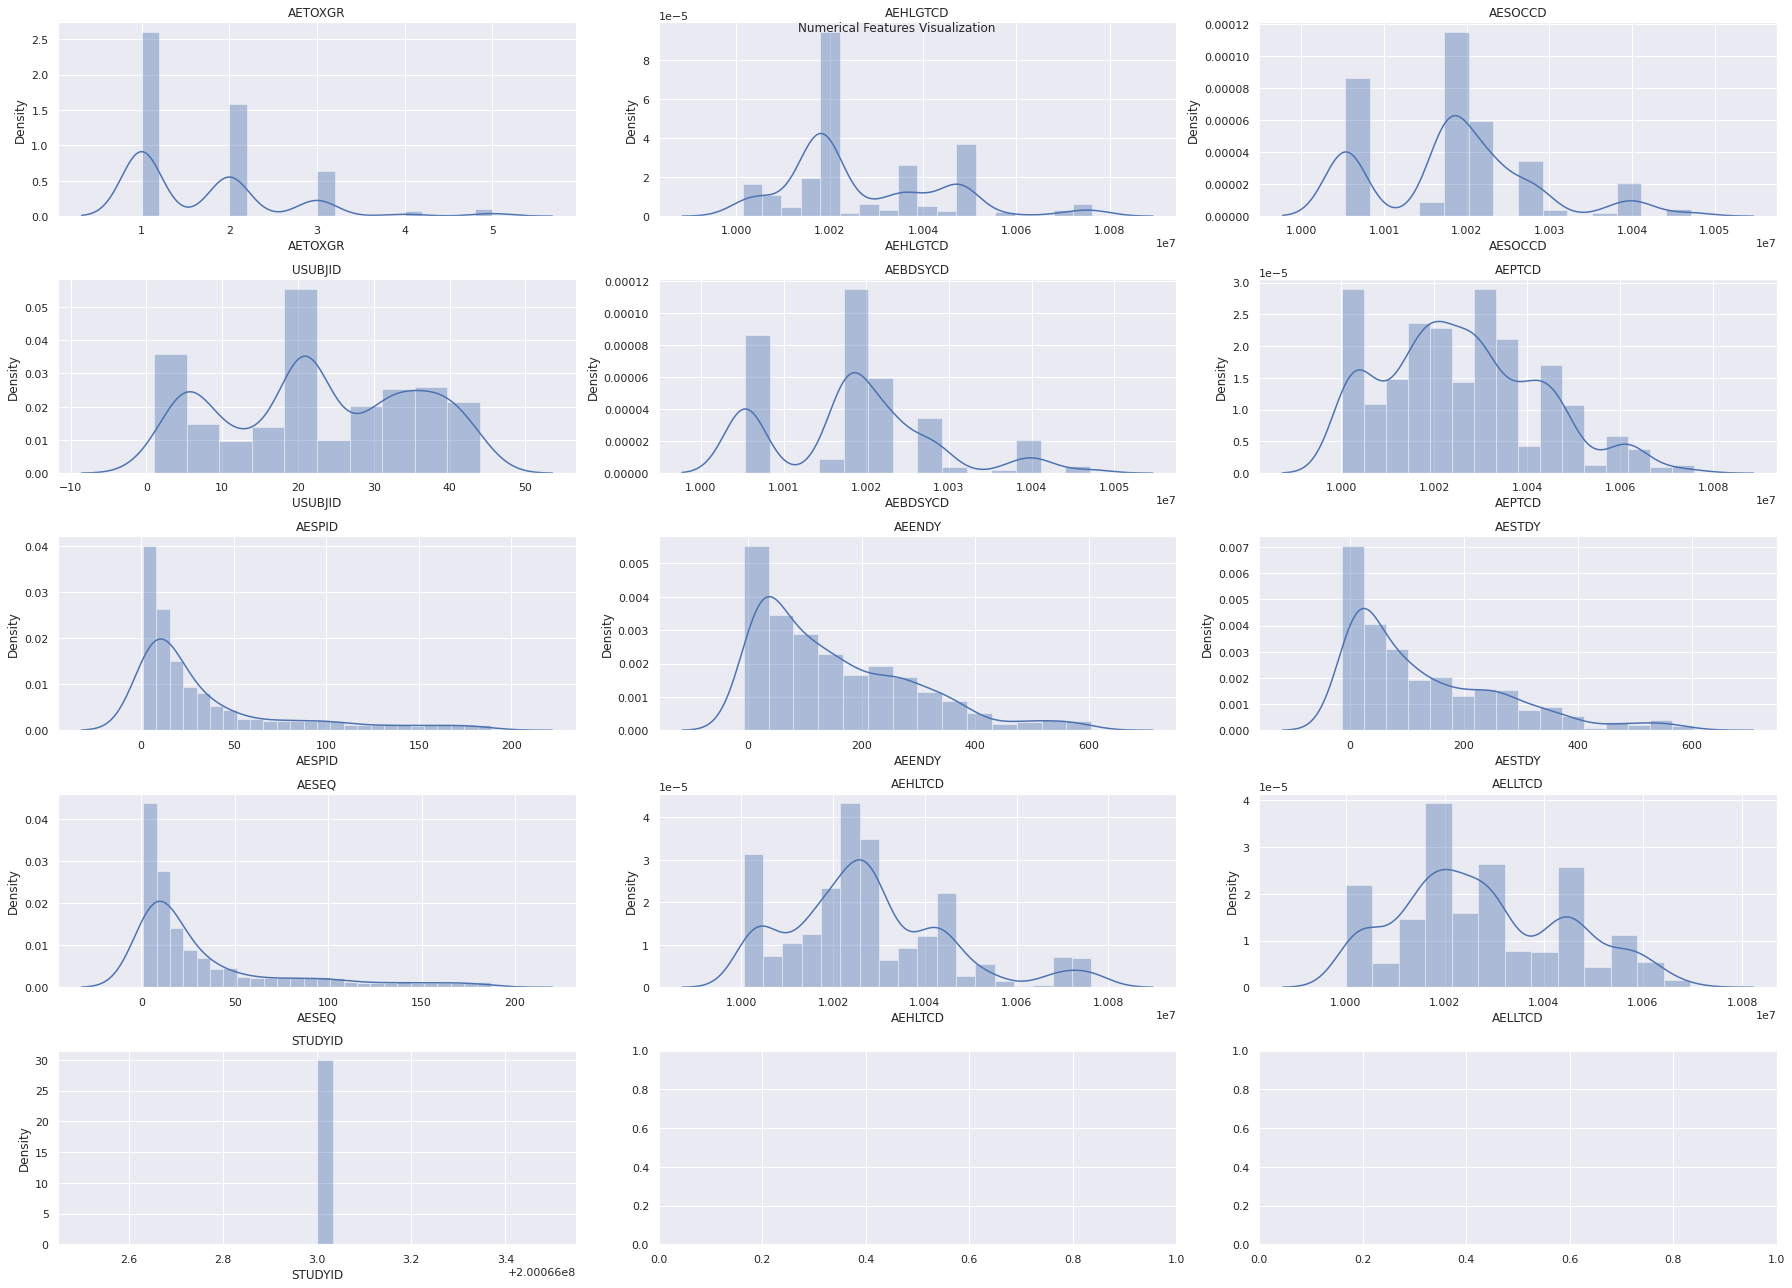

In [ ]:
# data[categorical_cols].value_counts().plot(kind='bar', figsize=(25, 15))
n_plots = len(numerical_cols)
n_cols = 3
rows = n_plots/n_cols if n_plots%n_cols == 0 else (n_plots /n_cols)+1
fig, axes = plt.subplots(int(rows),n_cols, figsize=(25,18))
fig.suptitle('Numerical Features Visualization')

for i, col in enumerate(numerical_cols) :
    sns.distplot(data[col], ax = axes[int(i/n_cols)][i%n_cols])
    axes[int(i/n_cols)][i%n_cols].set_title(col)
    fig.tight_layout()
plt.show()

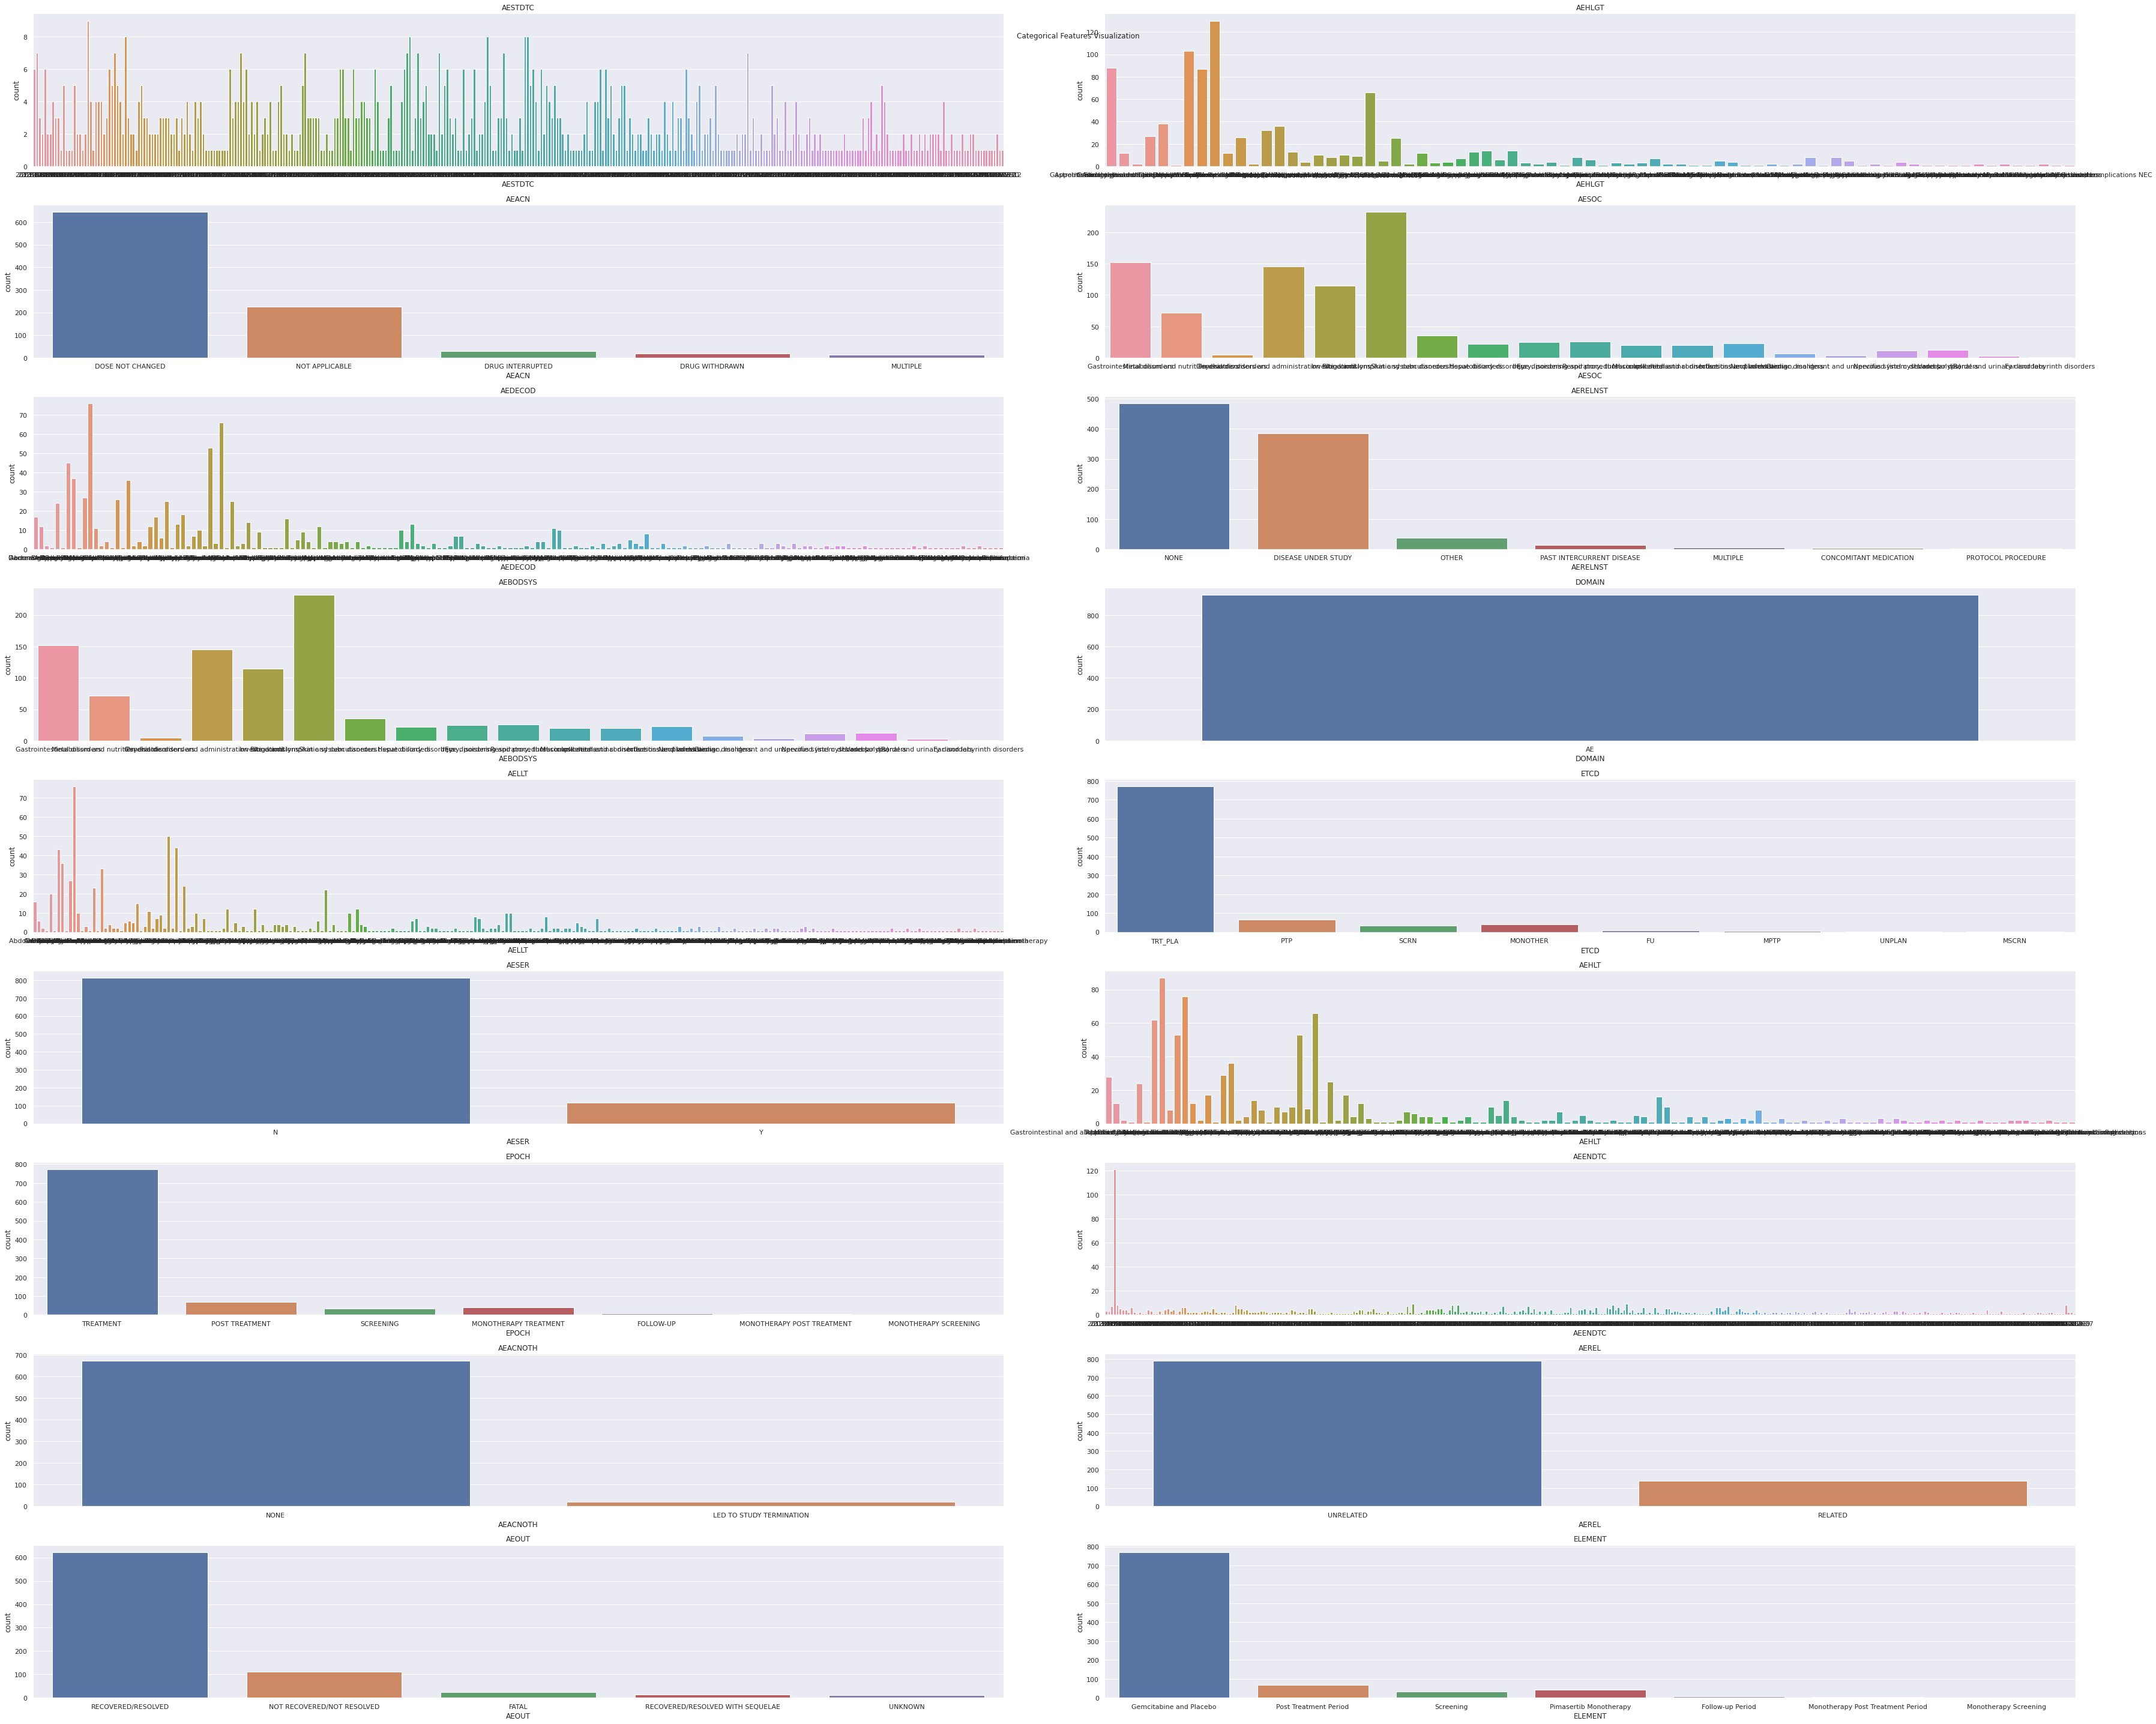

In [ ]:
# data[categorical_cols].value_counts().plot(kind='bar', figsize=(25, 15))
n_plots = len(categorical_cols)
n_cols = 2
rows = n_plots/n_cols if n_plots%n_cols == 0 else (n_plots/n_cols)+1
fig, axes = plt.subplots(int(rows),n_cols, figsize=(50,40))
fig.suptitle('Categorical Features Visualization')

for i, col in enumerate(categorical_cols) :
    sns.countplot(x = col, data = data, ax = axes[int(i/n_cols)][i%n_cols])
    axes[int(i/n_cols)][i%n_cols].set_title(col)
    fig.tight_layout()
plt.show()

In [ ]:
data.describe()

,STUDYID,USUBJID,AESEQ,AESPID,AELLTCD,AEPTCD,AEHLTCD,AEHLGTCD,AEBDSYCD,AESOCCD,AETOXGR,AESTDY,AEENDY
count,930.0,930.000000,930.000000,930.000000,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,930.000000,923.000000,794.000000
mean,200066003.0,22.891398,34.194624,35.219355,1.002775e+07,1.002580e+07,1.002758e+07,1.002687e+07,1.001854e+07,1.001854e+07,1.696774,133.201517,153.998741
std,0.0,12.484739,43.169550,43.363848,1.669967e+04,1.662049e+04,1.752433e+04,1.693297e+04,9.946559e+03,9.946559e+03,0.895203,136.296484,137.410381
min,200066003.0,1.000000,1.000000,1.000000,1.000008e+07,1.000006e+07,1.000050e+07,1.000132e+07,1.000533e+07,1.000533e+07,1.000000,-13.000000,-8.000000
25%,200066003.0,12.000000,7.000000,7.000000,1.001626e+07,1.001392e+07,1.001629e+07,1.001798e+07,1.000754e+07,1.000754e+07,1.000000,22.000000,37.000000
50%,200066003.0,21.000000,15.000000,16.000000,1.002428e+07,1.002438e+07,1.002469e+07,1.001981e+07,1.001806e+07,1.001806e+07,1.000000,89.000000,113.000000
75%,200066003.0,34.000000,42.000000,43.000000,1.004355e+07,1.003766e+07,1.003701e+07,1.003872e+07,1.002289e+07,1.002289e+07,2.000000,218.000000,245.000000
max,200066003.0,44.000000,187.000000,189.000000,1.006950e+07,1.007587e+07,1.007629e+07,1.007629e+07,1.004706e+07,1.004706e+07,5.000000,604.000000,604.000000


In [ ]:
data.head()

,STUDYID,DOMAIN,USUBJID,AESEQ,AESPID,AELLT,AELLTCD,AEDECOD,AEPTCD,AEHLT,AEHLTCD,AEHLGT,AEHLGTCD,AEBODSYS,AEBDSYCD,AESOC,AESOCCD,AESER,AEACN,AEACNOTH,AEREL,AERELNST,AEOUT,AETOXGR,ETCD,ELEMENT,EPOCH,AESTDTC,AEENDTC,AESTDY,AEENDY
0,200066003,AE,1,1.0,11,Abdominal pain,10000081.0,Abdominal pain,10000081.0,Gastrointestinal and abdominal pains (excl ora...,10017926.0,Gastrointestinal signs and symptoms,10018012.0,Gastrointestinal disorders,10017947.0,Gastrointestinal disorders,10017947.0,N,DOSE NOT CHANGED,NONE,UNRELATED,NONE,RECOVERED/RESOLVED,1,TRT_PLA,Gemcitabine and Placebo,TREATMENT,2013-07-11,2013-07-11,3.0,3.0
1,200066003,AE,1,2.0,17,Anorexia,10002646.0,Decreased appetite,10061428.0,Appetite disorders,10003022.0,Appetite and general nutritional disorders,10003018.0,Metabolism and nutrition disorders,10027433.0,Metabolism and nutrition disorders,10027433.0,N,NOT APPLICABLE,NONE,UNRELATED,NONE,RECOVERED/RESOLVED,2,PTP,Post Treatment Period,POST TREATMENT,2013-09-14,2013-11-26,68.0,141.0
2,200066003,AE,1,3.0,6,Anxiety,10002855.0,Anxiety,10002855.0,Anxiety symptoms,10002869.0,Anxiety disorders and symptoms,10002861.0,Psychiatric disorders,10037175.0,Psychiatric disorders,10037175.0,N,DOSE NOT CHANGED,NONE,UNRELATED,NONE,RECOVERED/RESOLVED,1,TRT_PLA,Gemcitabine and Placebo,TREATMENT,2013-08-13,2013-08-14,36.0,37.0
3,200066003,AE,1,4.0,7,Anxiety,10002855.0,Anxiety,10002855.0,Anxiety symptoms,10002869.0,Anxiety disorders and symptoms,10002861.0,Psychiatric disorders,10037175.0,Psychiatric disorders,10037175.0,N,DOSE NOT CHANGED,NaN,UNRELATED,NONE,NOT RECOVERED/NOT RESOLVED,1,TRT_PLA,Gemcitabine and Placebo,TREATMENT,2013-08-20,******,43.0,NaN
4,200066003,AE,1,5.0,18,Dehydration,10012174.0,Dehydration,10012174.0,Total fluid volume decreased,10044084.0,Electrolyte and fluid balance conditions,10014412.0,Metabolism and nutrition disorders,10027433.0,Metabolism and nutrition disorders,10027433.0,N,NOT APPLICABLE,NaN,UNRELATED,NONE,RECOVERED/RESOLVED,2,PTP,Post Treatment Period,POST TREATMENT,2013-09-14,2013-09-25,68.0,79.0


In [ ]:
column_dict = {c:data[c].dtype for c in data.columns}
date_cols = ['AESTDTC', 'AEENDTC']
for dc in date_cols :
    data[dc] = data[dc].replace('******', None)
    data[dc] = pd.to_datetime(data[dc])
    data[dc] = data[dc].apply(lambda x: dt.datetime.date(x))
    print(data[dc].dtype)
    
data.head()

object
object


,STUDYID,DOMAIN,USUBJID,AESEQ,AESPID,AELLT,AELLTCD,AEDECOD,AEPTCD,AEHLT,AEHLTCD,AEHLGT,AEHLGTCD,AEBODSYS,AEBDSYCD,AESOC,AESOCCD,AESER,AEACN,AEACNOTH,AEREL,AERELNST,AEOUT,AETOXGR,ETCD,ELEMENT,EPOCH,AESTDTC,AEENDTC,AESTDY,AEENDY
0,200066003,AE,1,1.0,11,Abdominal pain,10000081.0,Abdominal pain,10000081.0,Gastrointestinal and abdominal pains (excl ora...,10017926.0,Gastrointestinal signs and symptoms,10018012.0,Gastrointestinal disorders,10017947.0,Gastrointestinal disorders,10017947.0,N,DOSE NOT CHANGED,NONE,UNRELATED,NONE,RECOVERED/RESOLVED,1,TRT_PLA,Gemcitabine and Placebo,TREATMENT,2013-07-11,2013-07-11,3.0,3.0
1,200066003,AE,1,2.0,17,Anorexia,10002646.0,Decreased appetite,10061428.0,Appetite disorders,10003022.0,Appetite and general nutritional disorders,10003018.0,Metabolism and nutrition disorders,10027433.0,Metabolism and nutrition disorders,10027433.0,N,NOT APPLICABLE,NONE,UNRELATED,NONE,RECOVERED/RESOLVED,2,PTP,Post Treatment Period,POST TREATMENT,2013-09-14,2013-11-26,68.0,141.0
2,200066003,AE,1,3.0,6,Anxiety,10002855.0,Anxiety,10002855.0,Anxiety symptoms,10002869.0,Anxiety disorders and symptoms,10002861.0,Psychiatric disorders,10037175.0,Psychiatric disorders,10037175.0,N,DOSE NOT CHANGED,NONE,UNRELATED,NONE,RECOVERED/RESOLVED,1,TRT_PLA,Gemcitabine and Placebo,TREATMENT,2013-08-13,2013-08-14,36.0,37.0
3,200066003,AE,1,4.0,7,Anxiety,10002855.0,Anxiety,10002855.0,Anxiety symptoms,10002869.0,Anxiety disorders and symptoms,10002861.0,Psychiatric disorders,10037175.0,Psychiatric disorders,10037175.0,N,DOSE NOT CHANGED,NaN,UNRELATED,NONE,NOT RECOVERED/NOT RESOLVED,1,TRT_PLA,Gemcitabine and Placebo,TREATMENT,2013-08-20,2013-08-14,43.0,NaN
4,200066003,AE,1,5.0,18,Dehydration,10012174.0,Dehydration,10012174.0,Total fluid volume decreased,10044084.0,Electrolyte and fluid balance conditions,10014412.0,Metabolism and nutrition disorders,10027433.0,Metabolism and nutrition disorders,10027433.0,N,NOT APPLICABLE,NaN,UNRELATED,NONE,RECOVERED/RESOLVED,2,PTP,Post Treatment Period,POST TREATMENT,2013-09-14,2013-09-25,68.0,79.0


In [ ]:
for dc in date_cols :
    x = list(data[dc].sort_values())
    print(f'{dc}\nMin Date: {x[0]}\tMax Date: {x[-1]}\t{len(data[dc].unique())}')

AESTDTC
Min Date: 2012-12-24	Max Date: 2015-02-02	359
AEENDTC
Min Date: 2013-01-01	Max Date: 2015-02-02	343


#### Findings From Sample Data
- Data is from a single study (ID:200066003)
- Study Domain is Adverse Event (AE)
- AESTDTC
    - Min Date: 2012-12-24	
    - Max Date: 2015-02-02
- AEENDTC
    - Min Date: 2013-01-01	
    - Max Date: 2015-02-02